In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
import warnings
# warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("brainstroke.csv")
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [5]:
data['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [6]:
data['smoking_status']=data['smoking_status'].str.replace("Unknown",'never smoked')

In [7]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [8]:
data['smoking_status'].value_counts()

never smoked       3338
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [9]:
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['smoking_status']=le.fit_transform(data['smoking_status'])
data['ever_married']=le.fit_transform(data['ever_married'])
data['work_type']=le.fit_transform(data['work_type'])
data['Residence_type']=le.fit_transform(data['Residence_type'])
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,0,1
1,1,80.0,0,1,1,1,0,105.92,32.5,1,1
2,0,49.0,0,0,1,1,1,171.23,34.4,2,1
3,0,79.0,1,0,1,2,0,174.12,24.0,1,1
4,1,81.0,0,0,1,1,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,0,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,2,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,2,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,2,0


<AxesSubplot:xlabel='gender', ylabel='count'>

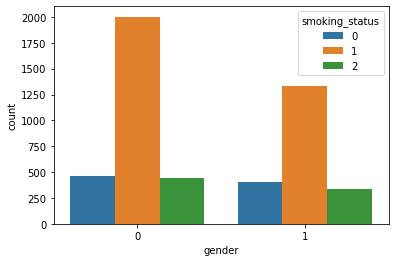

In [10]:
sns.countplot(x='gender',hue='smoking_status',data=data)

In [11]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(x)
print(y)

[[  1.    67.     0.   ... 228.69  36.6    0.  ]
 [  1.    80.     0.   ... 105.92  32.5    1.  ]
 [  0.    49.     0.   ... 171.23  34.4    2.  ]
 ...
 [  0.    45.     1.   ...  95.02  31.8    2.  ]
 [  1.    40.     0.   ...  83.94  30.     2.  ]
 [  0.    80.     1.   ...  83.75  29.1    1.  ]]
[1 1 1 ... 0 0 0]


In [12]:
# Standardition
ss=StandardScaler()
x=ss.fit_transform(x)

In [13]:
x

array([[ 1.18390850e+00,  1.04058433e+00, -3.26185770e-01, ...,
         2.72341090e+00,  1.19323816e+00, -1.71021868e+00],
       [ 1.18390850e+00,  1.61427033e+00, -3.26185770e-01, ...,
        -5.22766599e-04,  5.89389611e-01,  3.18261553e-02],
       [-8.44659868e-01,  2.46249882e-01, -3.26185770e-01, ...,
         1.44852918e+00,  8.69221866e-01,  1.77387099e+00],
       ...,
       [-8.44659868e-01,  6.97311148e-02,  3.06573766e+00, ...,
        -2.42364234e-01,  4.86293516e-01,  1.77387099e+00],
       [ 1.18390850e+00, -1.50917344e-01, -3.26185770e-01, ...,
        -4.88199415e-01,  2.21189274e-01,  1.77387099e+00],
       [-8.44659868e-01,  1.61427033e+00,  3.06573766e+00, ...,
        -4.92415000e-01,  8.86371531e-02,  3.18261553e-02]])

In [14]:
data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [15]:
# Data Balancing
ros=RandomOverSampler()
x_data,y_data=ros.fit_resample(x,y)

In [16]:
print('Actual value: ',Counter(y))
print('Balanced Value:',Counter(y_data))

Actual value:  Counter({0: 4733, 1: 248})
Balanced Value: Counter({1: 4733, 0: 4733})


In [17]:
# Cross Validation
kfs=StratifiedKFold(n_splits=5,random_state=11,shuffle=True)
kfs.get_n_splits(x_data,y_data)
print(kfs)

StratifiedKFold(n_splits=5, random_state=11, shuffle=True)


In [18]:
lg=LogisticRegression()

In [24]:
for train_data,test_data in kfs.split(x_data,y_data):
    x_train,x_test=x_data[train_data],x_data[test_data]
    y_train,y_test=y_data[train_data],y_data[test_data]
    
    score=cross_val_score(lg,x_train,y_train,cv=kfs)
    print("Train:",train_data.shape,"Test:",test_data.shape)
    y_pred=cross_val_predict(lg,x_test,y_test)
    
    print("checking balancing...",Counter(y_test))
#     print(y_pred)
    print(score)
    print(np.mean(score)*100)

Train: (7572,) Test: (1894,)
checking balancing... Counter({1: 947, 0: 947})
[0.77359736 0.7980198  0.76882431 0.76486129 0.76948481]
77.495751424548
Train: (7573,) Test: (1893,)
checking balancing... Counter({1: 947, 0: 946})
[0.7669967  0.77293729 0.78151815 0.7681638  0.77080581]
77.20843524246744
Train: (7573,) Test: (1893,)
checking balancing... Counter({1: 947, 0: 946})
[0.78415842 0.77491749 0.76567657 0.78533686 0.78137384]
77.8292635075925
Train: (7573,) Test: (1893,)
checking balancing... Counter({0: 947, 1: 946})
[0.77689769 0.76963696 0.77425743 0.76486129 0.78731836]
77.45943471493781
Train: (7573,) Test: (1893,)
checking balancing... Counter({0: 947, 1: 946})
[0.76633663 0.78481848 0.77029703 0.77212682 0.77675033]
77.40658583691922


In [25]:
from  sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

77.76016904384575

In [30]:
y_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [29]:
# voting Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

rc=RandomForestClassifier()
lg=LogisticRegression()
knn=KNeighborsClassifier()

rc.fit(x_data,y_data)
lg.fit(x_data,y_data)
knn.fit(x_data,y_data)

y_pred_rc=rc.predict(x_test)
y_pred_lg=lg.predict(x_test)
y_pred_knn=knn.predict(x_test)

print('Random Forest:',y_pred_rc)
print('LogisticRegression:',y_pred_lg)
print("KNeighborsClassifier:",y_pred_knn)

Random Forest: [1 1 1 ... 1 1 1]
LogisticRegression: [1 1 1 ... 0 1 0]
KNeighborsClassifier: [1 1 1 ... 1 1 1]


In [34]:
from sklearn.ensemble import VotingClassifier
vote=VotingClassifier(estimators=[('Random Forest',rc),("Logistic Regression",lg),("KNeighbors",knn)])
vote.fit(x_data,y_data)
y_pred_vote=vote.predict(x_test)


In [35]:
y_pred_vote

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
ab=vote.score(x_test,y_test)*100
print('My Accuracy Score:',ab)

My Accuracy Score: 96.19651347068145


In [37]:
# baggingClassifier
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(base_estimator=rc,n_estimators=5,random_state=1)
bg.fit(x_data,y_data)
y_pred_bg=bg.predict(x_test)
print(y_pred_bg)

[1 1 1 ... 1 1 1]


In [39]:
bg2=BaggingClassifier(base_estimator=lg,n_estimators=5,random_state=1)
bg2.fit(x_data,y_data)
y_pred_bg2=bg2.predict(x_test)
print(y_pred_bg2)

[1 1 1 ... 0 1 0]


In [40]:
bg3=BaggingClassifier(base_estimator=knn,n_estimators=5,random_state=1)
bg3.fit(x_data,y_data)
y_pred_bg3=bg3.predict(x_test)
print(y_pred_bg3)

[1 1 1 ... 1 1 1]


In [41]:
# Averaging
Average_vote=(y_pred_rc+y_pred_lg+y_pred_knn)/3
print(np.round(Average_vote))


[1. 1. 1. ... 1. 1. 1.]
